<a href="https://colab.research.google.com/github/Das0908/pytorch-tutorial/blob/main/simpleneauralnetwork.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [124]:
#create a model class that inherits nn.module
class Model(nn.Module):
  #input layer ->4 features of flower
  # h1 layer ->8 neurons
  # h2 layer ->9 neurons
  # output(3 classes of iris flower )

  def __init__(self , in_features=4 ,h1=8,h2=9,out_features=3):
    super().__init__() #instantiate the nn module
    self.fc1 = nn.Linear(in_features , h1)
    self.fc2 = nn.Linear(h1 , h2)
    self.out = nn.Linear(h2 , out_features)

  def forward(self , x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.out(x)

    return x

In [126]:
torch.manual_seed(32) #any number , pick a manual seed for randomization
model = Model()

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [132]:
%matplotlib inline

In [133]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [134]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [135]:
#change last column from string
my_df['species'] = my_df['species'].replace('setosa' , 0.0)
my_df['species'] = my_df['species'].replace('virginica' , 1.0)
my_df['species'] = my_df['species'].replace('versicolor' , 2.0)

In [136]:
# train , test ,slpit
X = my_df.drop('species' , axis=1)
y = my_df['species']

In [137]:
#convert X and y to numpy arrays
X = X.values
y = y.values

In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train , X_test , y_train , y_test = train_test_split(X , y , train_size=0.2 , random_state = 41)

In [140]:
#convert x values to FloatTensors
X_train = torch.FloatTensor(X_train)  # ok if not put float
X_test = torch.FloatTensor(X_test)

In [141]:
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

In [142]:
y_train

tensor([0, 1, 0, 0, 2, 1, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 1,
        1, 0, 2, 2, 2, 1])

In [143]:
loss_criteria = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters() , lr = 0.01)

In [144]:
epochs = 200
losses = []

for i in range(epochs):
  #forward propogation
  y_pred = model.forward(X_train)
  loss = loss_criteria(y_pred , y_train)

  losses.append(loss.detach().numpy())


  if i % 10 == 0:
    print(f"epoch : {i} losss : {loss}")

  #back propogation

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch : 0 losss : 1.163001298904419
epoch : 10 losss : 0.9124640226364136
epoch : 20 losss : 0.7356442809104919
epoch : 30 losss : 0.5944188833236694
epoch : 40 losss : 0.4667055904865265
epoch : 50 losss : 0.3708157539367676
epoch : 60 losss : 0.2696658670902252
epoch : 70 losss : 0.17226676642894745
epoch : 80 losss : 0.0989295095205307
epoch : 90 losss : 0.05765318498015404
epoch : 100 losss : 0.03618388622999191
epoch : 110 losss : 0.024435440078377724
epoch : 120 losss : 0.017494820058345795
epoch : 130 losss : 0.013141002506017685
epoch : 140 losss : 0.010258070193231106
epoch : 150 losss : 0.008254907093942165
epoch : 160 losss : 0.006806736346334219
epoch : 170 losss : 0.005729855969548225
epoch : 180 losss : 0.004898636601865292
epoch : 190 losss : 0.004243164788931608


Text(0.5, 0, 'epochs')

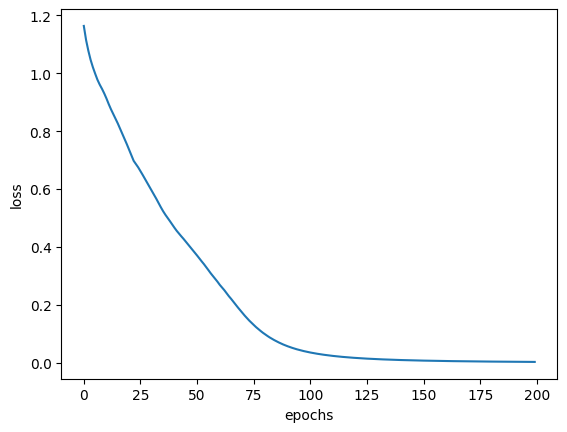

In [145]:
plt.plot( range(epochs) , losses )
plt.ylabel("loss")
plt.xlabel("epochs")

In [146]:
#evaluate model on test set
with torch.no_grad():              #turns off back propogation
  y_eval = model.forward(X_test)

  loss = loss_criteria(y_eval , y_test)


In [147]:
loss

tensor(0.0916)

In [148]:
correct = 0
with torch.no_grad():
  for i , data in enumerate(X_test):

    y_val = model.forward(data)

    print(f"{i+1} ). {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}")

    #correct or not
    if y_val.argmax().item() == y_test[i]:
      correct+=1

  print(f"we got - {correct} correct")


1 ). tensor([-6.8897, 10.2127,  2.7952]) 	 1 	 1
2 ). tensor([-8.7330, 14.1630,  1.5638]) 	 1 	 1
3 ). tensor([-9.7735, 15.5219,  2.0853]) 	 1 	 1
4 ). tensor([-2.8182,  0.5181,  6.7584]) 	 2 	 2
5 ). tensor([-7.6469, 11.2801,  3.0266]) 	 1 	 1
6 ). tensor([-1.9968, -0.5435,  6.3347]) 	 2 	 2
7 ). tensor([-5.9433,  7.7318,  3.9969]) 	 1 	 1
8 ). tensor([-2.3212, -0.3385,  6.8125]) 	 2 	 2
9 ). tensor([-6.5220,  8.8942,  3.7199]) 	 1 	 1
10 ). tensor([-8.9196, 14.2345,  1.8849]) 	 1 	 1
11 ). tensor([-5.0952,  5.8722,  4.6035]) 	 1 	 1
12 ). tensor([ 4.5252, -4.4508, -3.5792]) 	 0 	 0
13 ). tensor([ 4.1698, -4.1021, -3.2335]) 	 0 	 0
14 ). tensor([-1.2028, -0.8502,  4.8856]) 	 2 	 2
15 ). tensor([ 3.7358, -3.9524, -2.4158]) 	 0 	 0
16 ). tensor([-5.2078,  5.9580,  4.7810]) 	 1 	 1
17 ). tensor([ 3.9647, -4.0517, -2.8179]) 	 0 	 0
18 ). tensor([-5.9840,  8.0383,  3.6957]) 	 2 	 1
19 ). tensor([ 4.2273, -4.2313, -3.1852]) 	 0 	 0
20 ). tensor([ 3.0573, -3.4060, -1.5849]) 	 0 	 0
21 ). ten

In [155]:
model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [150]:
new_iris = torch.Tensor([5.9 , 7.0 ,5.1 , 1.8])
y = model(new_iris)
print(y.argmax().item())

0


In [156]:
torch.save(model.state_dict(), 'iris_model.pt') # doesnt save the whole model , only its trained weights and biases

In [161]:
new_model = Model()
new_model.load_state_dict(torch.load('iris_model.pt'))

<All keys matched successfully>

In [162]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)

In [164]:
# save entire model , not just its weights and biases
torch.save(model , 'model1.pth')

In [165]:
loaded_model = torch.load('model1.pth')

In [166]:
loaded_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)